In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#read excel
data = pd.read_excel(r"C:\Users\reddy\OneDrive\Desktop\capstone\meritrust\exp_data_analysis\wsu_model_data.xlsx")

In [3]:
#rows and columns
data.shape

(15482, 33)

In [4]:
#Descriptive statistics of the Dataframe
data.describe()

,ACCTNBR_OBF,NOTEBALAMT,COFFBALAMT,ORIGBALAMT,NOTEINTRATE,ORIGTERM_MNTHS,CREDITSCORE,PMTAMT_MNTHLY,ORIGLTV,DEBT,...,MONETARYCOLLAT,BOATCOLLAT,REALESTATECOLLAT,PROPCOUNT,SUMPROPVALUES,PERSAGEATFUNDDATE,HADCK,HADCD,HADSAV,TOTALDEPOSITS
count,15482.000000,15482.000000,802.000000,15450.000000,15453.000000,15432.000000,14647.000000,15348.000000,12686.000000,1.512700e+04,...,15482.0,15482.000000,15482.000000,15482.000000,1.548200e+04,15476.000000,15482.0,15482.0,15482.0,0.0
mean,7741.500000,699.011185,6525.540723,17783.200819,0.066967,66.840591,715.257595,325.645255,1.050370,2.037680e+03,...,0.0,0.006782,0.012983,0.822697,1.813207e+04,41.797375,0.0,0.0,0.0,NaN
std,4469.412769,2817.995193,5725.706968,13155.984319,0.045823,85.147007,78.779165,1048.421669,0.282505,8.712339e+04,...,0.0,0.094513,0.113204,0.386811,2.546829e+04,15.029807,0.0,0.0,0.0,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,377.000000,0.010000,0.020000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000e+00,4.120000,0.0,0.0,0.0,NaN
25%,3871.250000,0.000000,1491.367500,8189.590000,0.040000,48.000000,663.000000,177.970000,0.900000,2.117000e+01,...,0.0,0.000000,0.000000,1.000000,7.920500e+03,29.040000,0.0,0.0,0.0,NaN
50%,7741.500000,0.000000,5461.870000,15643.275000,0.050000,63.000000,714.000000,285.460000,1.080000,2.992000e+01,...,0.0,0.000000,0.000000,1.000000,1.510000e+04,39.605000,0.0,0.0,0.0,NaN
75%,11611.750000,0.000000,9936.777500,24766.387500,0.080000,72.000000,772.000000,408.320000,1.240000,3.882000e+01,...,0.0,0.000000,0.000000,1.000000,2.315000e+04,53.482500,0.0,0.0,0.0,NaN
max,15482.000000,63291.600000,32370.650000,200118.600000,0.210000,1080.000000,892.000000,100805.310000,2.560000,6.469294e+06,...,0.0,3.000000,1.000000,3.000000,1.111645e+06,93.900000,0.0,0.0,0.0,NaN


# DATA CLEANING AND PRE PROCESSING

In [5]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

# To count the number of duplicates
num_duplicates = len(duplicates)

# To check if any duplicates exist
if num_duplicates > 0:
    print(f"{num_duplicates} duplicate rows found.")
else:
    print("No duplicates found.")

No duplicates found.


C:\Users\reddy\AppData\Local\Temp\ipykernel_14812\1785112455.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


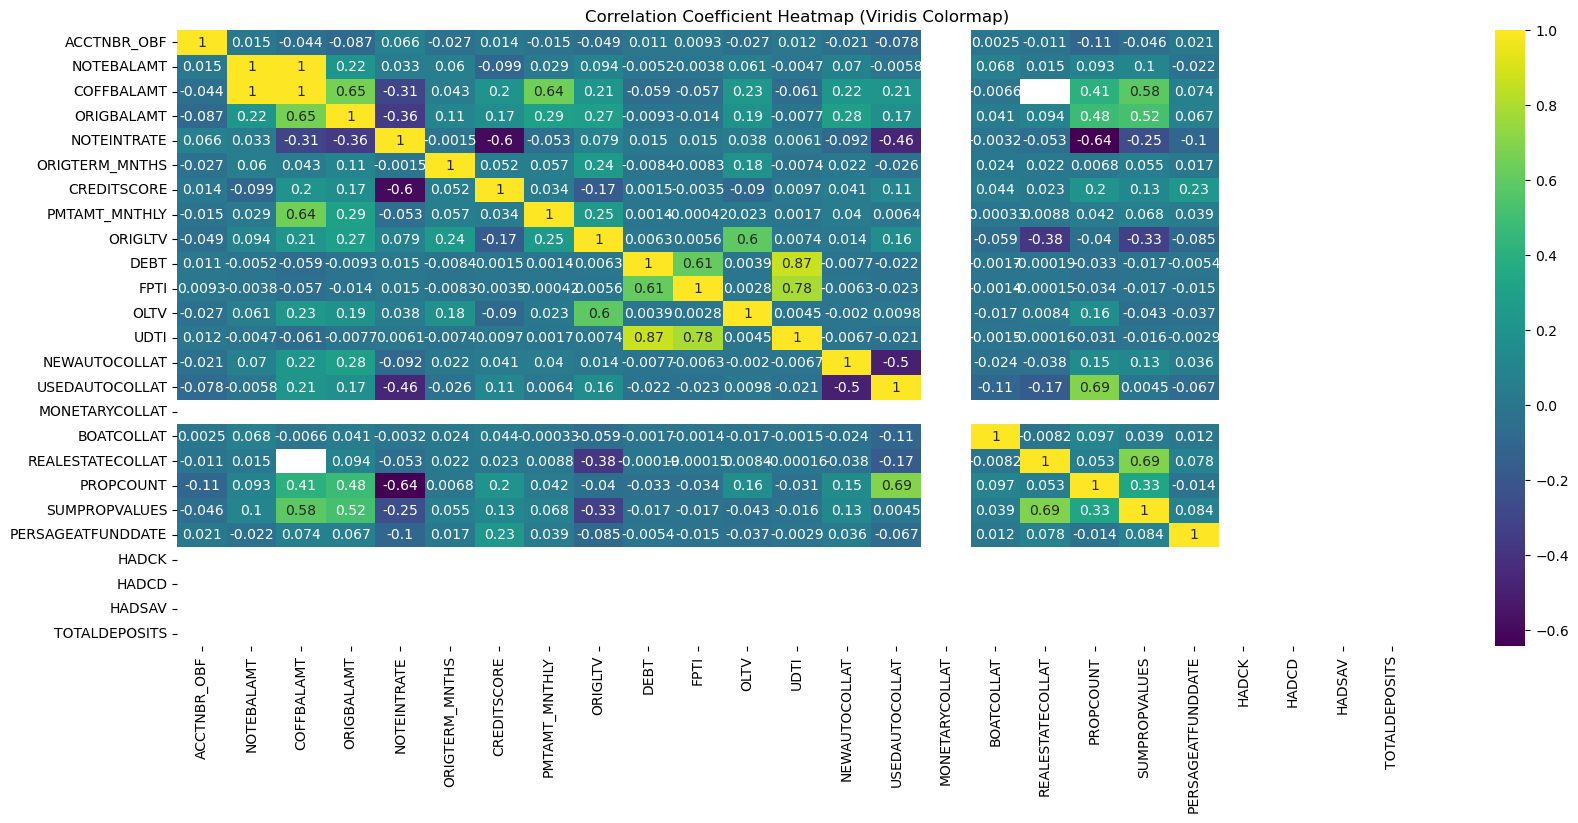

In [6]:
corr_matrix = data.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.title('Correlation Coefficient Heatmap (Viridis Colormap)')
plt.show()

In [7]:
#dropping off the columns doest show any correlation with dataset.
uncorrelated_column_list = ['MONETARYCOLLAT','HADCK','HADCD','HADSAV', 'TOTALDEPOSITS']
data.drop(columns=uncorrelated_column_list, axis=1, inplace=True)

In [8]:
# From above we see that DEBT and UDTI are strongly correlated which is not aspired so we can drop either of the columns
# From above we see that FPTI and UDTI are strongly correlated which is not aspired so we can drop either of the columns
# As UDTI is having high correlation coefficient with both we can drop it.
data.drop(columns=['UDTI'],inplace=True)

In [9]:
#We are dropping the N/A columns which are not required as in the model definitions. 
not_applicable_columns = ['ORIGLTV','CREDITGRADE']
data.drop(columns=not_applicable_columns, axis=1, inplace=True)

In [10]:
# Date mature and closed dates have nothing to do with charge off accounts. Hence dropping them.
dd_columns = ['DATEMAT','CLOSEDATE']
data.drop(columns=dd_columns, inplace=True)

In [11]:
#Account number is not required. hence dropping it.
notrequired =['ACCTNBR_OBF']
data.drop(columns=notrequired, inplace = True)

In [12]:
#lets see the number of features left
for column_name in data.columns:
    print(column_name)

LOAN_TYPE
ACCTSTATCD
NOTEBALAMT
COFFBALAMT
ORIGBALAMT
NOTEINTRATE
FUNDDATE
COFFDATE
ORIGTERM_MNTHS
CREDITSCORE
CREDITTIER
PMTAMT_MNTHLY
DEBT
FPTI
OLTV
NEWAUTOCOLLAT
USEDAUTOCOLLAT
BOATCOLLAT
REALESTATECOLLAT
PROPCOUNT
SUMPROPVALUES
PERSAGEATFUNDDATE


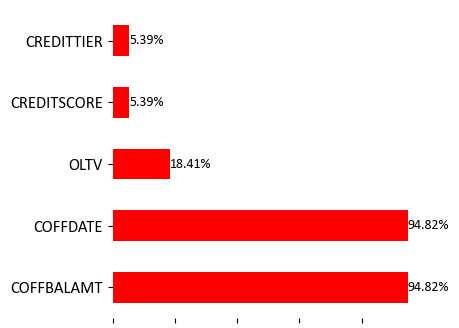

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / data.shape[0]) * 100

# Filter columns with missing values exceeding 5%
columns_with_missing_values = missing_percentages[missing_percentages > 5]

# Sort the columns in descending order based on missing percentage
columns_with_missing_values = columns_with_missing_values.sort_values(ascending=False)

# Set the font size and type for the plot
font = {'family': 'Calibri', 'size': 12}
plt.rc('font', **font)

# Check if there are any columns with missing values exceeding 5%
if not columns_with_missing_values.empty:
    plt.figure(figsize=(4, 4))
    ax = columns_with_missing_values.plot(kind='barh', color='red')

    # Set the y-axis label rotation to 0 degrees since it's horizontal
    #plt.title('Columns with More Than 5% Missing Values', fontsize=16, color='black')
    #plt.ylabel('Column', fontsize=12, color='black')
    #plt.xlabel('Percentage', fontsize=14, color='black')

    # Remove x-axis labels
    ax.set_xticklabels([])

    # Add percentage values beside the bars
    for index, value in enumerate(columns_with_missing_values):
        plt.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontsize=10)

    # Despine everything
    sns.despine(ax=ax, left=True, bottom=True, top=True, right=True)

    plt.show()
else:
    print("No columns with more than 5% missing values.")


In [14]:
#columns COFFBALAMT and COFFDATE has more than 90% of missing values. Lets drop those two columns
drop_mv_columns = ['COFFBALAMT','COFFDATE']
data.drop(columns=drop_mv_columns, inplace=True)

In [15]:
#lets see the number of features left
for column_name in data.columns:
    print(column_name)

LOAN_TYPE
ACCTSTATCD
NOTEBALAMT
ORIGBALAMT
NOTEINTRATE
FUNDDATE
ORIGTERM_MNTHS
CREDITSCORE
CREDITTIER
PMTAMT_MNTHLY
DEBT
FPTI
OLTV
NEWAUTOCOLLAT
USEDAUTOCOLLAT
BOATCOLLAT
REALESTATECOLLAT
PROPCOUNT
SUMPROPVALUES
PERSAGEATFUNDDATE


# dropped off all the unwanted features , now lets work on the missing values for rest of the features.

In [16]:
#lets identify the missing values in the leftover features.
data.isnull().sum()

LOAN_TYPE               0
ACCTSTATCD              0
NOTEBALAMT              0
ORIGBALAMT             32
NOTEINTRATE            29
FUNDDATE                0
ORIGTERM_MNTHS         50
CREDITSCORE           835
CREDITTIER            835
PMTAMT_MNTHLY         134
DEBT                  355
FPTI                  355
OLTV                 2851
NEWAUTOCOLLAT           0
USEDAUTOCOLLAT          0
BOATCOLLAT              0
REALESTATECOLLAT        0
PROPCOUNT               0
SUMPROPVALUES           0
PERSAGEATFUNDDATE       6
dtype: int64

In [17]:
# # Calculate the mean of the "CREDITSCORE" column
# mean_credit_score = data['CREDITSCORE'].mean()

# # Replace missing values with the mean value
# data['CREDITSCORE'].fillna(mean_credit_score, inplace=True)

# # Check for missing values in the leftover features
# missing_values = data.isnull().sum()

In [18]:
#drop the values of the rows which are having null values for CREDITSCORE
data = data.dropna(subset=['CREDITSCORE', 'CREDITTIER'], how='all')
#lets identify the missing values in the leftover features.
data.isnull().sum()

LOAN_TYPE               0
ACCTSTATCD              0
NOTEBALAMT              0
ORIGBALAMT             26
NOTEINTRATE            25
FUNDDATE                0
ORIGTERM_MNTHS          0
CREDITSCORE             0
CREDITTIER              0
PMTAMT_MNTHLY         125
DEBT                  205
FPTI                  205
OLTV                 2632
NEWAUTOCOLLAT           0
USEDAUTOCOLLAT          0
BOATCOLLAT              0
REALESTATECOLLAT        0
PROPCOUNT               0
SUMPROPVALUES           0
PERSAGEATFUNDDATE       5
dtype: int64

In [19]:
#fill out missing with 0 and rest 1
data['OLTV'] = data['OLTV'].fillna(0).astype(int)

In [20]:
data.isnull().sum()

LOAN_TYPE              0
ACCTSTATCD             0
NOTEBALAMT             0
ORIGBALAMT            26
NOTEINTRATE           25
FUNDDATE               0
ORIGTERM_MNTHS         0
CREDITSCORE            0
CREDITTIER             0
PMTAMT_MNTHLY        125
DEBT                 205
FPTI                 205
OLTV                   0
NEWAUTOCOLLAT          0
USEDAUTOCOLLAT         0
BOATCOLLAT             0
REALESTATECOLLAT       0
PROPCOUNT              0
SUMPROPVALUES          0
PERSAGEATFUNDDATE      5
dtype: int64

In [21]:
#fill the rest missing values with zeros.
columns_to_fill = ['ORIGBALAMT', 'NOTEINTRATE','PMTAMT_MNTHLY','DEBT','FPTI']

data[columns_to_fill] = data[columns_to_fill].fillna(0)

In [22]:
#as age cant be zero filling it with median.
columns_to_fill = ['PERSAGEATFUNDDATE']

data[columns_to_fill] = data[columns_to_fill].fillna(int(data[columns_to_fill].median()))

In [23]:
data.isnull().sum()

LOAN_TYPE            0
ACCTSTATCD           0
NOTEBALAMT           0
ORIGBALAMT           0
NOTEINTRATE          0
FUNDDATE             0
ORIGTERM_MNTHS       0
CREDITSCORE          0
CREDITTIER           0
PMTAMT_MNTHLY        0
DEBT                 0
FPTI                 0
OLTV                 0
NEWAUTOCOLLAT        0
USEDAUTOCOLLAT       0
BOATCOLLAT           0
REALESTATECOLLAT     0
PROPCOUNT            0
SUMPROPVALUES        0
PERSAGEATFUNDDATE    0
dtype: int64

In [24]:
#now we have removed all the missing values ,remove any null/inf values in the dataset.
# Check for 'inf' values and replace them with np.nan
data = data.replace([np.inf, -np.inf], np.nan)

# Check for 'nan' values (missing values) and replace them with 0
data = data.fillna(0)

In [25]:
#rows and columns
data

,LOAN_TYPE,ACCTSTATCD,NOTEBALAMT,ORIGBALAMT,NOTEINTRATE,FUNDDATE,ORIGTERM_MNTHS,CREDITSCORE,CREDITTIER,PMTAMT_MNTHLY,DEBT,FPTI,OLTV,NEWAUTOCOLLAT,USEDAUTOCOLLAT,BOATCOLLAT,REALESTATECOLLAT,PROPCOUNT,SUMPROPVALUES,PERSAGEATFUNDDATE
0,Indirect A,CLS,0.0,32000.00,0.05,2017-01-04,121.0,716.0,A,343.33,0.00,0.00,0,0,0,0,1,1,320000.0,34.74
1,Indirect A,CLS,0.0,7000.00,0.04,2017-01-09,60.0,799.0,A+,128.57,0.00,0.00,0,0,0,0,1,1,68900.0,62.90
2,Indirect A,CLS,0.0,11800.00,0.05,2017-01-18,49.0,715.0,A,271.16,0.00,0.00,0,0,0,0,1,1,61000.0,62.33
3,Indirect A,CLS,0.0,18500.00,0.05,2017-01-09,121.0,801.0,A+,198.49,0.00,0.00,0,0,0,0,1,1,185000.0,35.77
4,Indirect A,CLS,0.0,19000.00,0.05,2017-01-20,121.0,646.0,D,203.85,0.00,0.00,0,0,0,0,1,1,172000.0,30.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15476,Indirect A,CLS,0.0,10757.86,0.04,2017-12-29,72.0,726.0,A,168.59,32.91,11.24,99,0,1,0,0,1,10850.0,19.48
15477,Direct,CLS,0.0,24310.00,0.04,2017-12-29,84.0,806.0,A+,369.89,42.68,10.04,89,0,1,0,0,1,27150.0,30.73
15478,Indirect A,CLS,0.0,2040.00,0.14,2017-12-29,24.0,674.0,C,102.84,32.62,2.32,0,0,0,0,0,0,0.0,36.25
15479,Direct,CLS,0.0,17079.25,0.07,2017-12-29,63.0,609.0,E,327.59,42.87,13.83,102,0,1,0,0,1,16600.0,41.01


# DISTRIBUTION PLOTS

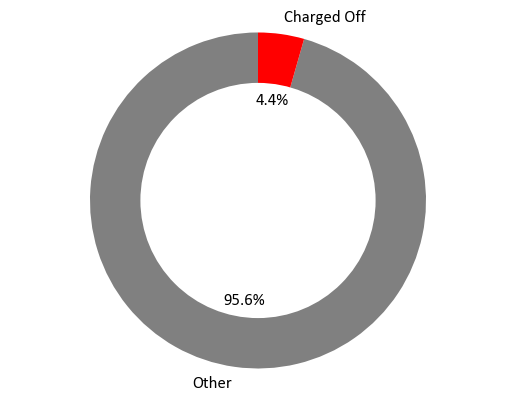

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df_CO = data.copy()
# Create a new column for grouping
df_CO['ACCTSTATCD_Grouped'] = df_CO['ACCTSTATCD'].apply(lambda x: 'Other' if x != 'CO' else x)

# Count the occurrences of each value in the grouped column
value_counts = df_CO['ACCTSTATCD_Grouped'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Draw a donut plot with a custom label
ax.pie(value_counts, labels=['Other', 'Charged Off'], autopct='%1.1f%%', startangle=90, colors=['grey', 'red'], wedgeprops=dict(width=0.4))

# Draw a circle in the center to create a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
#plt.title('Distributioin of Account Status')

# Show the plot
plt.show()


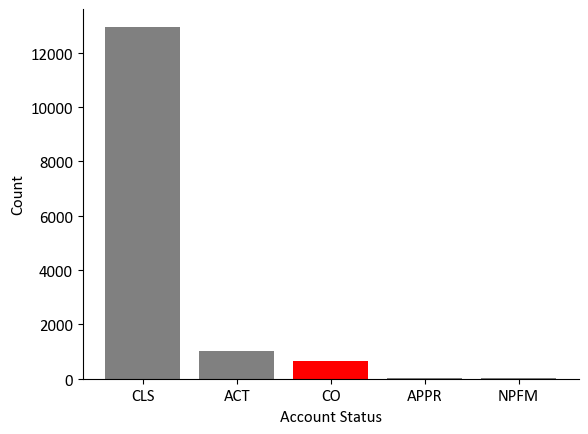

In [27]:
df_CO = data.copy()

# Count the occurrences of each value in the column
value_counts = df_CO['ACCTSTATCD'].value_counts()

# Create a list of colors for each bar
colors = ['red' if value == 'CO' else 'gray' for value in value_counts.index]

# Create the bar plot
plt.bar(value_counts.index, value_counts.values, color=colors)

# Set labels and title
plt.xlabel('Account Status')
plt.ylabel('Count')
#plt.title('Bar Plot of ACCTSTATCD Values')


sns.despine()
# Show the plot
plt.show()


In [28]:
#lets check the final value counts for or dv.
status_counts = data['ACCTSTATCD'].value_counts()

print(status_counts)

CLS     12959
ACT      1004
CO        648
APPR       25
NPFM       11
Name: ACCTSTATCD, dtype: int64


CLS     12959
ACT      1004
CO        648
APPR       25
NPFM       11
Name: ACCTSTATCD, dtype: int64


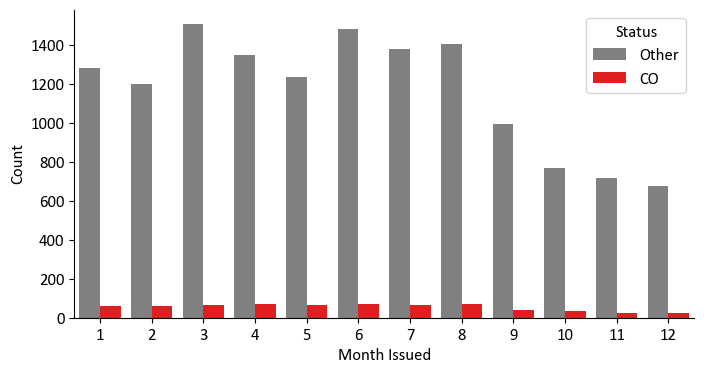

In [29]:
font_props = {'fontname': 'Calibri'}

df_CO = data.copy()

df_CO['FUNDDATE'] = pd.to_datetime(df_CO['FUNDDATE'])

df_CO['FUNDDATE_MonthIssued'] = df_CO['FUNDDATE'].dt.month

df_CO['Status'] = np.where(df_CO['ACCTSTATCD'] == 'CO', 'CO', 'Other')

custom_palette = {'CO': 'red', 'Other': 'grey'}

plt.figure(figsize=(8, 4))
sns.countplot(data=df_CO, x='FUNDDATE_MonthIssued',hue= 'Status', palette=custom_palette)
status_counts = data['ACCTSTATCD'].value_counts()
print(status_counts)
plt.xlabel('Month Issued', **font_props)
plt.ylabel('Count', **font_props)

sns.despine()
plt.show()

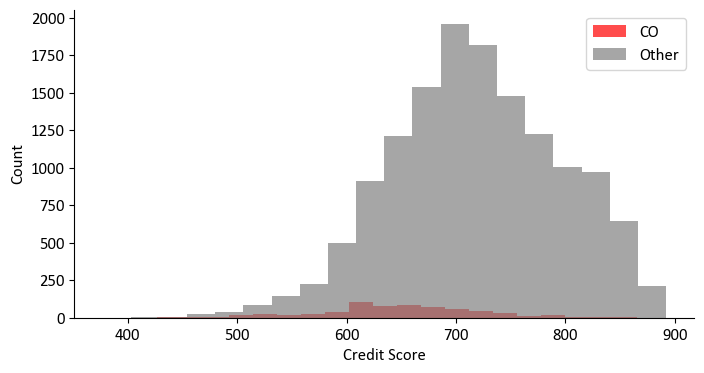

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
df_CO = data.copy()

# Create a new column for color based on your condition
df_CO['Color'] = np.where(df_CO['ACCTSTATCD'] == 'CO', 'CO', 'Other')

# Create a custom palette with colors for 'CO' and 'Not CO'
custom_palette = {'CO': 'red', 'Other': 'grey'}

plt.figure(figsize=(8, 4))

# Create histograms for 'CO' and 'Not CO' using a custom palette
for label, color in custom_palette.items():
    data_to_plot = df_CO[df_CO['Color'] == label]['CREDITSCORE']
    plt.hist(data_to_plot, bins=20, color=color, alpha=0.7, label=label)

plt.xlabel('Credit Score', **font_props)
plt.ylabel('Count', **font_props)

# Set font size and font family for all text elements in the plot
font_props = {'family': 'Calibri', 'size': 12}
plt.rc('font', **font_props)

# Remove the top and right spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend to distinguish 'CO' and 'Not CO' bars
plt.legend()

plt.show()

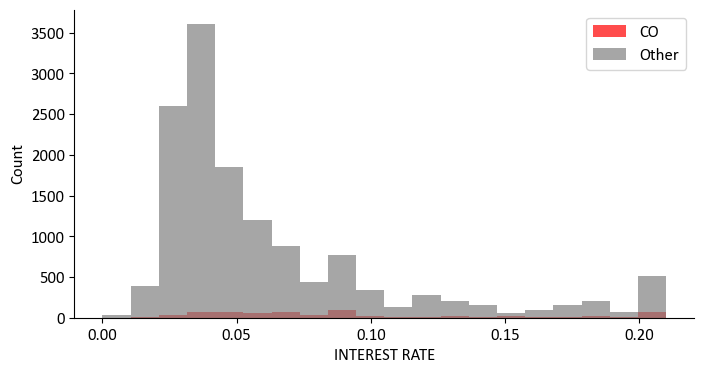

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
df_CO = data.copy()

# Create a new column for color based on your condition
df_CO['Color'] = np.where(df_CO['ACCTSTATCD'] == 'CO', 'CO', 'Other')

# Create a custom palette with colors for 'CO' and 'Not CO'
custom_palette = {'CO': 'red', 'Other': 'grey'}

plt.figure(figsize=(8, 4))

# Create histograms for 'CO' and 'Not CO' using a custom palette
for label, color in custom_palette.items():
    data_to_plot = df_CO[df_CO['Color'] == label]['NOTEINTRATE']
    plt.hist(data_to_plot, bins=20, color=color, alpha=0.7, label=label)

plt.xlabel('INTEREST RATE', **font_props)
plt.ylabel('Count', **font_props)

# Set font size and font family for all text elements in the plot
font_props = {'family': 'Calibri', 'size': 12}
plt.rc('font', **font_props)

# Remove the top and right spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend to distinguish 'CO' and 'Not CO' bars
plt.legend()

plt.show()

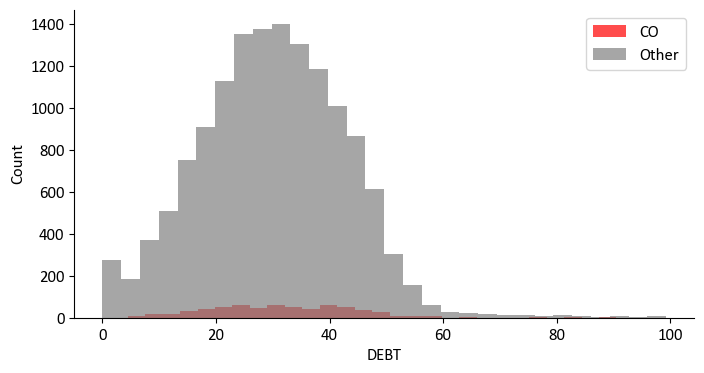

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
df_CO = data.copy()

# Filter values in the 'DEBT' column between 0 and 100
df_CO = df_CO[(df_CO['DEBT'] >= 0) & (df_CO['DEBT'] <= 100)]

# Create a new column for color based on your condition
df_CO['Color'] = np.where(df_CO['ACCTSTATCD'] == 'CO', 'CO', 'Other')

# Create a custom palette with colors for 'CO' and 'Not CO'
custom_palette = {'CO': 'red', 'Other': 'grey'}

plt.figure(figsize=(8, 4))

# Create histograms for 'CO' and 'Not CO' using a custom palette
for label, color in custom_palette.items():
    data_to_plot = df_CO[df_CO['Color'] == label]['DEBT']
    plt.hist(data_to_plot, bins=30, color=color, alpha=0.7, label=label)

# Set font size and font family for all text elements in the plot
font_props = {'family': 'Calibri', 'size': 12}
plt.rc('font', **font_props)

plt.xlabel('DEBT', **font_props)
plt.ylabel('Count', **font_props)

# Remove the top and right spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend to distinguish 'CO' and 'Not CO' bars
plt.legend()

plt.show()


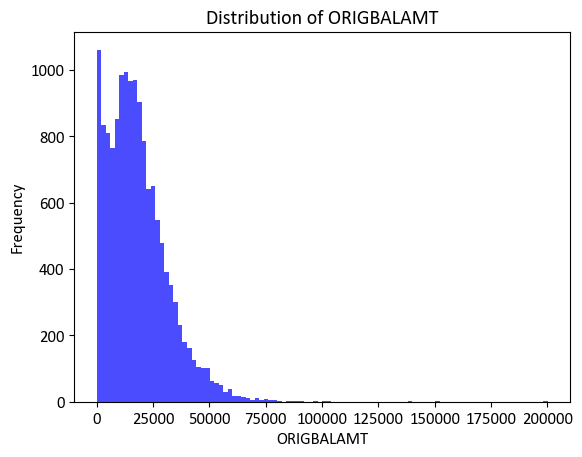

In [33]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of 'ORIGBALAMT'
plt.hist(data['ORIGBALAMT'], bins=100, color='blue', alpha=0.7)
plt.xlabel('ORIGBALAMT')
plt.ylabel('Frequency')
plt.title('Distribution of ORIGBALAMT')
plt.show()


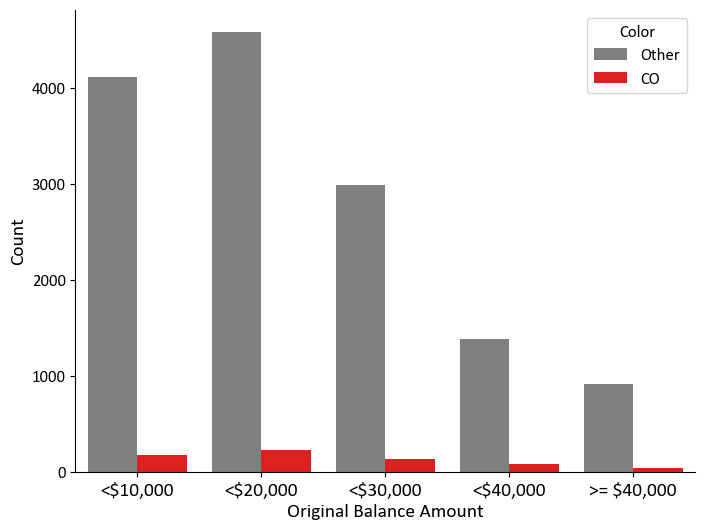

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font_props = {'fontname': 'Calibri'}
custom_palette = {'CO': 'red', 'Other': 'grey'}  # Updated to a dictionary for the palette

df_CO = data.copy()

# Update the bin ranges and labels
bins = [0, 10000, 20000, 30000, 40000, float('inf')]
bin_labels = ['<$10,000', '<$20,000', '<$30,000', '<$40,000', '>= $40,000']

df_CO['ORIGBALAMT_Bin'] = pd.cut(df_CO['ORIGBALAMT'], bins=bins, labels=bin_labels)

# Create the 'Color' column based on the condition
df_CO['Color'] = np.where(df_CO['ACCTSTATCD'] == 'CO', 'CO', 'Other')

plt.figure(figsize=(8, 6))
sns.countplot(data=df_CO, x='ORIGBALAMT_Bin', hue='Color', palette=custom_palette)
plt.xlabel('Original Balance Amount', fontsize=14, **font_props)
plt.ylabel('Count', fontsize=14, **font_props)
sns.despine()

# Set custom x-axis tick labels
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, fontsize=14)

plt.show()


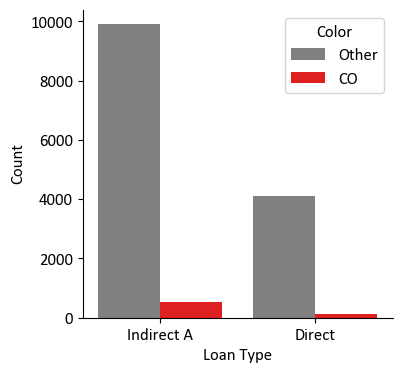

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font_props = {'fontname': 'Calibri'}
custom_palette = {'CO': 'red', 'Other': 'grey'}

df_CO = data.copy()

# Create the 'Color' column based on the condition
df_CO['Color'] = np.where(df_CO['ACCTSTATCD'] == 'CO', 'CO', 'Other')

plt.figure(figsize=(4, 4))
sns.countplot(data=df_CO, x='LOAN_TYPE', hue='Color', palette=custom_palette)
plt.xlabel('Loan Type', fontsize=12, **font_props)
plt.ylabel('Count', fontsize=12, **font_props)

sns.despine()

plt.show()


# Feature Engineering

1.Account Status

In [36]:
#1.converting the values in the 'ACCTSTATCD' column to numerical format. map 'CO' to 1 and any other value to 0
data['ACCTSTATCD'] = data['ACCTSTATCD'].apply(lambda x: 1 if x == 'CO' else 0)

2.Loan Type

In [37]:
#2.performing one-hot encoding on the 'LOAN_TYPE' column
data = pd.get_dummies(data, columns=['LOAN_TYPE'], prefix='loan_type', prefix_sep='', drop_first=True)

3.CreditScore

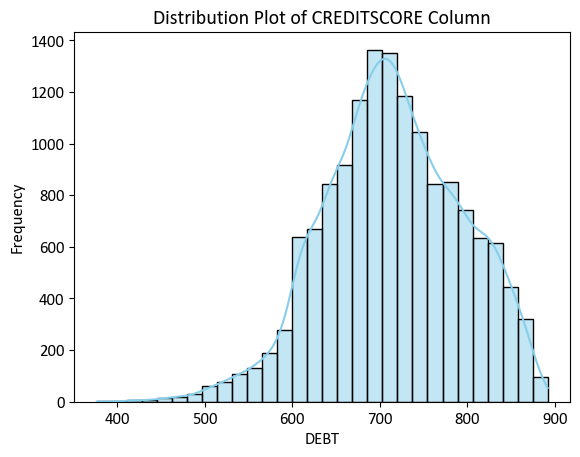

In [38]:
sns.histplot(data['CREDITSCORE'], kde=True, bins=30, color='skyblue')
plt.title('Distribution Plot of CREDITSCORE Column')
plt.xlabel('DEBT')
plt.ylabel('Frequency')
plt.show()

In [39]:
#Binning the credit score into ranges based on a difference of 100
score_bins = [400, 500, 600, 700, 800, 900]
score_labels = ['400-499', '500-599', '600-699', '700-799', '800-900']

data['CreditScore_Category'] = pd.cut(data['CREDITSCORE'], bins=score_bins, labels=score_labels)

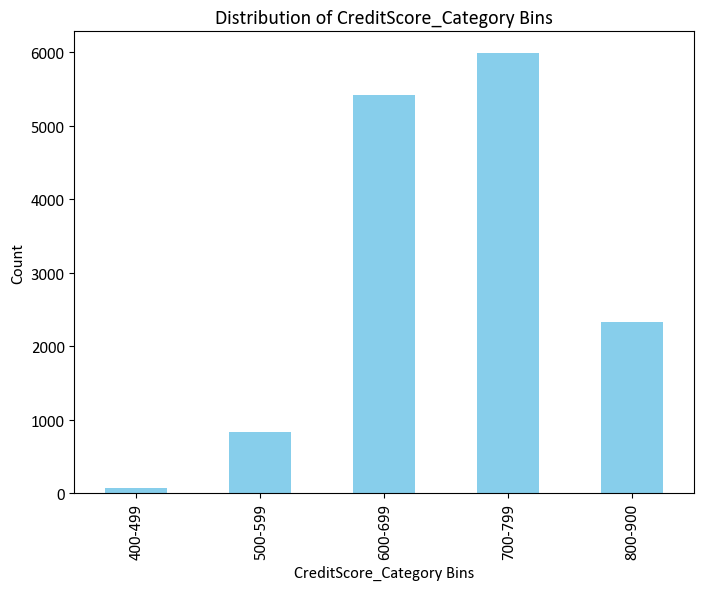

In [40]:
# Plot the distribution of bins
plt.figure(figsize=(8, 6))
data['CreditScore_Category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of CreditScore_Category Bins')
plt.xlabel('CreditScore_Category Bins')
plt.ylabel('Count')
plt.show()

In [41]:
#convert the bins in to one hot encoding. 
data = pd.get_dummies(data, columns=['CreditScore_Category'], prefix='CreditScore_Category', drop_first=True)

4.Original Loan Amount

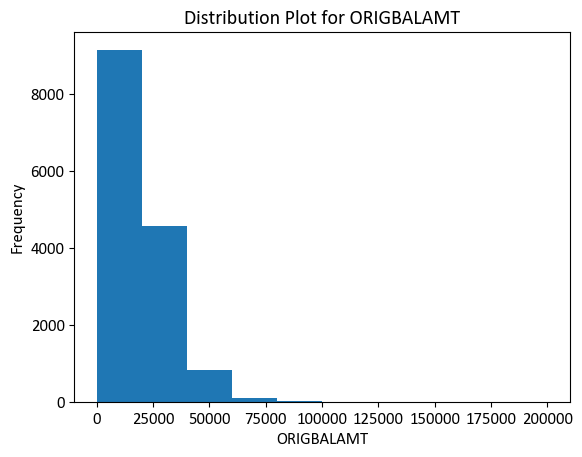

In [42]:
origbalamt_data = data['ORIGBALAMT']

# Create a distribution plot
plt.hist(origbalamt_data) 
plt.title('Distribution Plot for ORIGBALAMT')
plt.xlabel('ORIGBALAMT')
plt.ylabel('Frequency')
plt.show()


In [43]:
#4.Binning the original balance amount into ranges based on distribution.
bins = [0, 10000, 20000, 30000, 40000, np.inf]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

data['Loan_Amount_Category'] = pd.cut(data['ORIGBALAMT'], bins=bins, labels=labels)

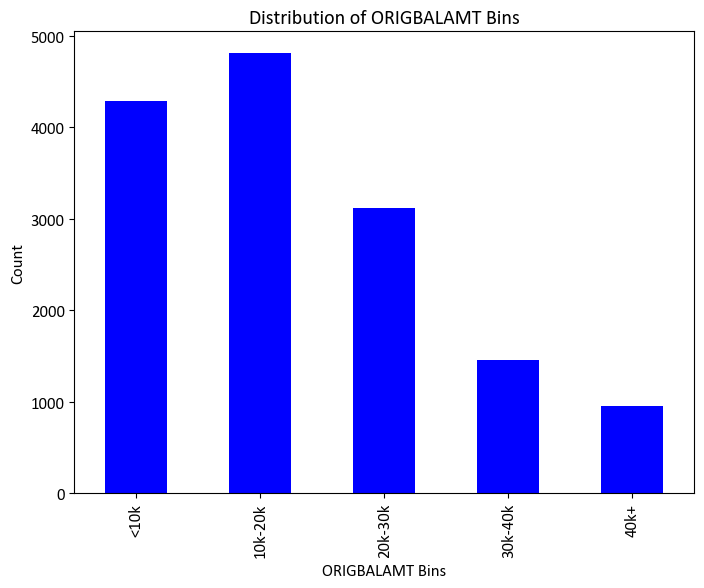

In [44]:
# Plot the distribution of bins
plt.figure(figsize=(8, 6))
data['Loan_Amount_Category'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of ORIGBALAMT Bins')
plt.xlabel('ORIGBALAMT Bins')
plt.ylabel('Count')
plt.show()

In [45]:
#convert the bins in to one hot encoding. 
data = pd.get_dummies(data, columns=['Loan_Amount_Category'], prefix='Loan_Amount_Category', drop_first=True)

5.Debt to income ratio

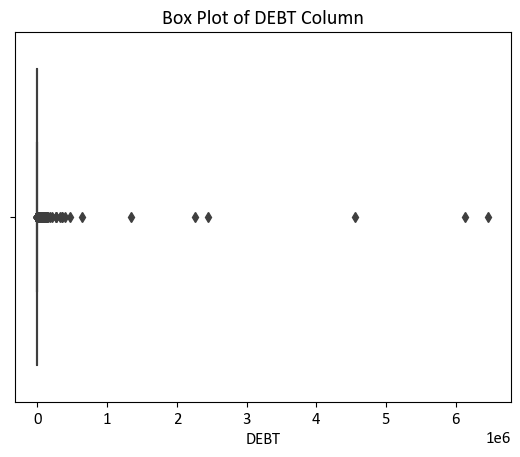

In [46]:
#distribution
sns.boxplot(x=data['DEBT'])
plt.title('Box Plot of DEBT Column')
plt.show()

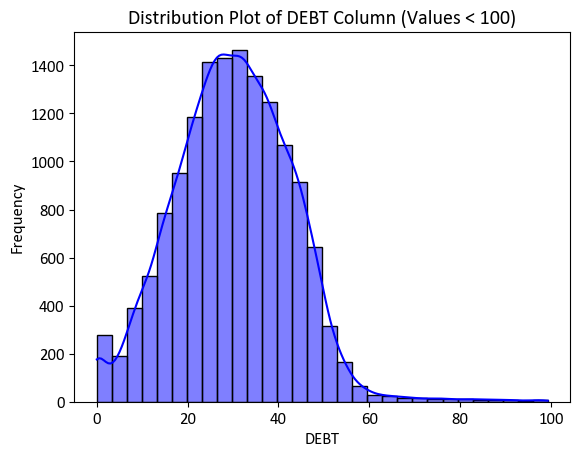

In [47]:
# We can see there are many outliers in the debt column and lets not onsider the outliers and see how distribution looks like.
filtered_data = data[data['DEBT'] < 100]

sns.histplot(filtered_data['DEBT'], kde=True, bins=30, color='blue')
plt.title('Distribution Plot of DEBT Column (Values < 100)')
plt.xlabel('DEBT')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Now, 'data' contains only rows where 'DEBT' is less than or equal to 100
data = data[data['DEBT'] <= 100]

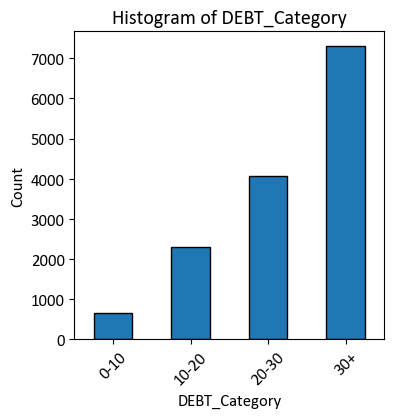

In [49]:
bins = [0, 10, 20, 30, float('inf')]  # 'float('inf')' represents positive infinity for the last bin
labels = ['0-10', '10-20', '20-30', '30+']

data['DEBT_Category'] = pd.cut(data['DEBT'], bins=bins, labels=labels)

# Sort the categories based on the average DEBT within each category
category_order = data.groupby('DEBT_Category')['DEBT'].mean().sort_values(ascending=True).index
category_counts = data['DEBT_Category'].value_counts().loc[category_order]

# Plot a bar chart for the DEBT_Category
plt.figure(figsize=(4, 4))
category_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('DEBT_Category')
plt.ylabel('Count')
plt.title('Histogram of DEBT_Category')
plt.xticks(rotation=45)
plt.show()


In [50]:
data = pd.get_dummies(data, columns=['DEBT_Category'], prefix='DEBT_Category', drop_first=True)

6.Fund issued date

In [51]:
# Assuming 'FUNDDATE' is the column containing timestamp values
data['FUNDDATE'] = pd.to_datetime(data['FUNDDATE'])

# Extract month and store it in the same column
data['FUNDDATE'] = data['FUNDDATE'].dt.month

7.Credit tier

In [52]:
7.#performing one-hot encoding on the 'credittier' column
data = pd.get_dummies(data, columns=['CREDITTIER'], prefix='credit_tier', prefix_sep='', drop_first=True)

8.Interest Rate

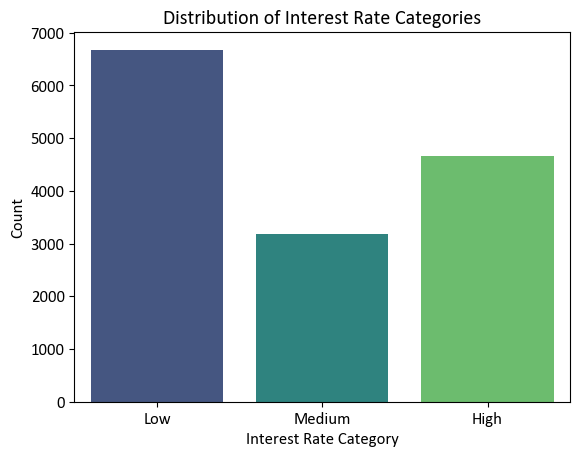

In [53]:
# Specify bins explicitly
bins = [data['NOTEINTRATE'].min(), data['NOTEINTRATE'].quantile(1/3), data['NOTEINTRATE'].quantile(2/3), data['NOTEINTRATE'].max()]
data['InterestRateCategory'] = pd.cut(data['NOTEINTRATE'], bins=bins, labels=['Low', 'Medium', 'High'], precision=2)

# Plot the distribution using a count plot
sns.countplot(x='InterestRateCategory', data=data, palette='viridis', order=['Low', 'Medium', 'High'])

# Set labels and title
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate Categories')

# Show the plot
plt.show()


In [54]:
# Assuming 'InterestRateCategory' is the new category column
data = pd.get_dummies(data, columns=['InterestRateCategory'], prefix='interest_rate', prefix_sep='', drop_first=True)

In [55]:
data.columns

Index(['ACCTSTATCD', 'NOTEBALAMT', 'ORIGBALAMT', 'NOTEINTRATE', 'FUNDDATE',
       'ORIGTERM_MNTHS', 'CREDITSCORE', 'PMTAMT_MNTHLY', 'DEBT', 'FPTI',
       'OLTV', 'NEWAUTOCOLLAT', 'USEDAUTOCOLLAT', 'BOATCOLLAT',
       'REALESTATECOLLAT', 'PROPCOUNT', 'SUMPROPVALUES', 'PERSAGEATFUNDDATE',
       'loan_typeIndirect A', 'CreditScore_Category_500-599',
       'CreditScore_Category_600-699', 'CreditScore_Category_700-799',
       'CreditScore_Category_800-900', 'Loan_Amount_Category_10k-20k',
       'Loan_Amount_Category_20k-30k', 'Loan_Amount_Category_30k-40k',
       'Loan_Amount_Category_40k+', 'DEBT_Category_10-20',
       'DEBT_Category_20-30', 'DEBT_Category_30+', 'credit_tierA+',
       'credit_tierB', 'credit_tierC', 'credit_tierD', 'credit_tierE',
       'credit_tierF', 'interest_rateMedium', 'interest_rateHigh'],
      dtype='object')

# SAMPLING

In [56]:
#there is an imabalance in out dv. hence sampling.
data['ACCTSTATCD'].value_counts()

0    13904
1      644
Name: ACCTSTATCD, dtype: int64

In [57]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load your dataset, assuming 'X' is your feature matrix and 'y' is your target variable
X = data.drop(columns=['ACCTSTATCD'])
y = data['ACCTSTATCD']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, use X_train_resampled and y_train_resampled for training your machine learning model.


In [58]:
data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [59]:
X_train_resampled

,NOTEBALAMT,ORIGBALAMT,NOTEINTRATE,FUNDDATE,ORIGTERM_MNTHS,CREDITSCORE,PMTAMT_MNTHLY,DEBT,FPTI,OLTV,...,DEBT_Category_20-30,DEBT_Category_30+,credit_tierA+,credit_tierB,credit_tierC,credit_tierD,credit_tierE,credit_tierF,interest_rateMedium,interest_rateHigh
0,0.000000,5663.210000,0.030000,7,25.000000,752.000000,233.420000,37.150000,5.770000,62,...,0,1,1,0,0,0,0,0,0,0
1,0.000000,23481.070000,0.070000,3,72.000000,660.000000,396.460000,35.880000,6.990000,125,...,0,1,0,0,0,1,0,0,0,1
2,9445.720000,15432.550000,0.090000,8,60.000000,616.000000,317.720000,34.260000,11.270000,124,...,0,1,0,0,0,0,1,0,0,1
3,9035.430000,10100.000000,0.210000,2,60.000000,667.000000,297.790000,56.400000,8.340000,0,...,0,1,0,0,0,1,0,0,0,1
4,13418.620000,70524.930000,0.070000,7,84.000000,688.000000,1060.690000,42.600000,15.320000,98,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22241,12961.795793,26790.235702,0.080927,8,72.000000,607.020182,513.177734,25.873114,6.716290,112,...,0,0,0,0,0,0,1,0,0,1
22242,0.000000,15172.839427,0.090000,4,72.000000,617.635175,273.800219,15.531578,4.764268,108,...,0,0,0,0,0,0,1,0,0,1
22243,2558.012644,2811.643132,0.189739,10,48.312618,625.494978,95.353330,33.691615,2.305009,0,...,0,0,0,0,0,0,0,0,0,1
22244,4004.381249,3296.678434,0.117153,7,52.390487,656.929449,87.187828,27.766486,4.182534,68,...,0,0,0,0,0,1,0,0,0,1


In [60]:
y_train_resampled

0        0
1        0
2        1
3        1
4        0
        ..
22241    1
22242    1
22243    1
22244    1
22245    1
Name: ACCTSTATCD, Length: 22246, dtype: int64

In [61]:
data['ACCTSTATCD'].value_counts()

0    11123
1    11123
Name: ACCTSTATCD, dtype: int64

In [62]:
data.shape

(22246, 38)

In [63]:
data

,NOTEBALAMT,ORIGBALAMT,NOTEINTRATE,FUNDDATE,ORIGTERM_MNTHS,CREDITSCORE,PMTAMT_MNTHLY,DEBT,FPTI,OLTV,...,DEBT_Category_30+,credit_tierA+,credit_tierB,credit_tierC,credit_tierD,credit_tierE,credit_tierF,interest_rateMedium,interest_rateHigh,ACCTSTATCD
0,0.000000,5663.210000,0.030000,7,25.000000,752.000000,233.420000,37.150000,5.770000,62,...,1,1,0,0,0,0,0,0,0,0
1,0.000000,23481.070000,0.070000,3,72.000000,660.000000,396.460000,35.880000,6.990000,125,...,1,0,0,0,1,0,0,0,1,0
2,9445.720000,15432.550000,0.090000,8,60.000000,616.000000,317.720000,34.260000,11.270000,124,...,1,0,0,0,0,1,0,0,1,1
3,9035.430000,10100.000000,0.210000,2,60.000000,667.000000,297.790000,56.400000,8.340000,0,...,1,0,0,0,1,0,0,0,1,1
4,13418.620000,70524.930000,0.070000,7,84.000000,688.000000,1060.690000,42.600000,15.320000,98,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22241,12961.795793,26790.235702,0.080927,8,72.000000,607.020182,513.177734,25.873114,6.716290,112,...,0,0,0,0,0,1,0,0,1,1
22242,0.000000,15172.839427,0.090000,4,72.000000,617.635175,273.800219,15.531578,4.764268,108,...,0,0,0,0,0,1,0,0,1,1
22243,2558.012644,2811.643132,0.189739,10,48.312618,625.494978,95.353330,33.691615,2.305009,0,...,0,0,0,0,0,0,0,0,1,1
22244,4004.381249,3296.678434,0.117153,7,52.390487,656.929449,87.187828,27.766486,4.182534,68,...,0,0,0,0,1,0,0,0,1,1


# Statistical Measure-VIF (Variance Inflation Factor)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'data' containing your dataset

# Drop the target variable (if present) and any non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(data_numeric.shape[1])]

# Display the VIF values
print(vif_data)

                         Feature        VIF
0                     NOTEBALAMT   3.298890
1                     ORIGBALAMT  51.464088
2                    NOTEINTRATE  15.517758
3                       FUNDDATE   4.996479
4                 ORIGTERM_MNTHS   1.731513
5                    CREDITSCORE  71.509541
6                  PMTAMT_MNTHLY  33.424132
7                           DEBT  18.158477
8                           FPTI   7.481911
9                           OLTV  10.582933
10                 NEWAUTOCOLLAT   1.870105
11                USEDAUTOCOLLAT   9.353600
12                    BOATCOLLAT   1.122013
13              REALESTATECOLLAT   3.316305
14                     PROPCOUNT  38.108531
15                 SUMPROPVALUES   9.356109
16             PERSAGEATFUNDDATE  10.754370
17           loan_typeIndirect A   4.601605
18  CreditScore_Category_500-599   4.390140
19  CreditScore_Category_600-699   4.651446
20  CreditScore_Category_700-799   5.077478
21  CreditScore_Category_800-900

In [65]:
#as there are some features with very highh multicolinearuty, lets only keep influencers and drop rest.
cols_to_keep = [ 'CreditScore_Category_500-599', 'CreditScore_Category_600-699',
       'CreditScore_Category_700-799', 'CreditScore_Category_800-900',
       'ACCTSTATCD', 'Loan_Amount_Category_10k-20k',
       'Loan_Amount_Category_20k-30k', 'Loan_Amount_Category_30k-40k',
       'Loan_Amount_Category_40k+','interest_rateMedium', 'interest_rateHigh','DEBT_Category_10-20',
                'DEBT_Category_20-30', 'DEBT_Category_30+',
        'loan_typeIndirect A']
data = data.loc[:, cols_to_keep]

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'data' containing your dataset

# Drop the target variable (if present) and any non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(data_numeric.shape[1])]

# Display the VIF values
print(vif_data)

                         Feature       VIF
0   CreditScore_Category_500-599  1.282614
1   CreditScore_Category_600-699  2.743146
2   CreditScore_Category_700-799  2.461901
3   CreditScore_Category_800-900  1.569795
4                     ACCTSTATCD  2.365401
5   Loan_Amount_Category_10k-20k  2.045230
6   Loan_Amount_Category_20k-30k  1.744382
7   Loan_Amount_Category_30k-40k  1.439280
8      Loan_Amount_Category_40k+  1.352696
9            interest_rateMedium  1.544172
10             interest_rateHigh  2.541506
11           DEBT_Category_10-20  1.437980
12           DEBT_Category_20-30  1.787097
13             DEBT_Category_30+  2.402096
14           loan_typeIndirect A  3.547525


In [68]:
import pandas as pd

# Assuming df is your DataFrame containing the features
# Replace the column names with your actual feature names
features = [ 'CreditScore_Category_500-599', 'CreditScore_Category_600-699',
       'CreditScore_Category_700-799', 'CreditScore_Category_800-900',
       'ACCTSTATCD', 'Loan_Amount_Category_10k-20k',
       'Loan_Amount_Category_20k-30k', 'Loan_Amount_Category_30k-40k',
       'Loan_Amount_Category_40k+','interest_rateMedium', 'interest_rateHigh','DEBT_Category_10-20',
                'DEBT_Category_20-30', 'DEBT_Category_30+',
        'loan_typeIndirect A']

# Select the features from the DataFrame
selected_features = data[features]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Set a threshold for high collinearity (adjust as needed)
threshold = 0.5

# Find features with high correlation
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Display highly correlated pairs or a message if none are found
if not highly_correlated_pairs:
    print("No highly correlated feature pairs found.")
else:
    print("Highly Correlated Feature Pairs:")
    for pair in highly_correlated_pairs:
        print(pair)

No highly correlated feature pairs found.


Now our data looks good. 

# MODEL

In [69]:
#X will contain all the features (independent variables) except 'ACCTSTATCD'
#Y will contain the 'ACCTSTATCD' column, which is the target variable to predict.
X = data.drop('ACCTSTATCD', axis=1)
Y = data['ACCTSTATCD']

In [70]:
X.head()

,CreditScore_Category_500-599,CreditScore_Category_600-699,CreditScore_Category_700-799,CreditScore_Category_800-900,Loan_Amount_Category_10k-20k,Loan_Amount_Category_20k-30k,Loan_Amount_Category_30k-40k,Loan_Amount_Category_40k+,interest_rateMedium,interest_rateHigh,DEBT_Category_10-20,DEBT_Category_20-30,DEBT_Category_30+,loan_typeIndirect A
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,1,0,0,1,1
2,0,1,0,0,1,0,0,0,0,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,0,0,1,1


In [71]:
#Using logistic regression with L1 (Lasso) regularization to find the initial weights and select features based on the absolute value of the coefficients.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, Y)
coefficients = model.coef_[0]
selected_feature_indices = [i for i, coef in enumerate(coefficients) if abs(coef) > 0]
selected_features = X.columns[selected_feature_indices]

In [72]:
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to map coefficients to features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the DataFrame
print(coefficients_df)

                         Feature  Coefficient
0   CreditScore_Category_500-599    -4.155228
1   CreditScore_Category_600-699    -4.427949
2   CreditScore_Category_700-799    -6.693473
3   CreditScore_Category_800-900   -10.015290
4   Loan_Amount_Category_10k-20k     0.400733
5   Loan_Amount_Category_20k-30k     0.694115
6   Loan_Amount_Category_30k-40k     0.977621
7      Loan_Amount_Category_40k+     1.210401
8            interest_rateMedium    -1.202555
9              interest_rateHigh    -0.269087
10           DEBT_Category_10-20    -3.746755
11           DEBT_Category_20-30    -3.316691
12             DEBT_Category_30+    -2.656509
13           loan_typeIndirect A     0.258619


In [73]:
selected_features.tolist()

['CreditScore_Category_500-599',
 'CreditScore_Category_600-699',
 'CreditScore_Category_700-799',
 'CreditScore_Category_800-900',
 'Loan_Amount_Category_10k-20k',
 'Loan_Amount_Category_20k-30k',
 'Loan_Amount_Category_30k-40k',
 'Loan_Amount_Category_40k+',
 'interest_rateMedium',
 'interest_rateHigh',
 'DEBT_Category_10-20',
 'DEBT_Category_20-30',
 'DEBT_Category_30+',
 'loan_typeIndirect A']

In [74]:
X1 = data[selected_features.tolist()]
Y1 = data['ACCTSTATCD']

In [75]:
# Create a logistic regression model with L1 regularization
# We can adjust C for regularization strength
regular_model = LogisticRegression(penalty='l1', solver='liblinear',C=0.1)
regular_model.fit(X, Y)
regular_coefficients = regular_model.coef_[0]
regular_selected_feature_indices = [i for i, coef in enumerate(regular_coefficients) if abs(coef) > 0]
regular_selected_features = X.columns[regular_selected_feature_indices]

In [76]:
# Get the coefficients and feature names
regular_coefficients = regular_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to map coefficients to features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': regular_coefficients})

# Display the DataFrame
print(coefficients_df)

                         Feature  Coefficient
0   CreditScore_Category_500-599    -3.489121
1   CreditScore_Category_600-699    -3.736564
2   CreditScore_Category_700-799    -5.924880
3   CreditScore_Category_800-900    -8.598043
4   Loan_Amount_Category_10k-20k     0.313254
5   Loan_Amount_Category_20k-30k     0.576086
6   Loan_Amount_Category_30k-40k     0.828603
7      Loan_Amount_Category_40k+     1.017728
8            interest_rateMedium    -1.097753
9              interest_rateHigh    -0.216022
10           DEBT_Category_10-20    -3.541731
11           DEBT_Category_20-30    -3.151986
12             DEBT_Category_30+    -2.520802
13           loan_typeIndirect A     0.219429


In [77]:
regular_selected_features.tolist()

['CreditScore_Category_500-599',
 'CreditScore_Category_600-699',
 'CreditScore_Category_700-799',
 'CreditScore_Category_800-900',
 'Loan_Amount_Category_10k-20k',
 'Loan_Amount_Category_20k-30k',
 'Loan_Amount_Category_30k-40k',
 'Loan_Amount_Category_40k+',
 'interest_rateMedium',
 'interest_rateHigh',
 'DEBT_Category_10-20',
 'DEBT_Category_20-30',
 'DEBT_Category_30+',
 'loan_typeIndirect A']

In [78]:
X2 = data[regular_selected_features.tolist()]
Y2 = data['ACCTSTATCD']

# We Store the regularised features in X2,Y2 and normal features in X1,Y1

In [79]:
data.shape

(22246, 15)

In [80]:
X1

,CreditScore_Category_500-599,CreditScore_Category_600-699,CreditScore_Category_700-799,CreditScore_Category_800-900,Loan_Amount_Category_10k-20k,Loan_Amount_Category_20k-30k,Loan_Amount_Category_30k-40k,Loan_Amount_Category_40k+,interest_rateMedium,interest_rateHigh,DEBT_Category_10-20,DEBT_Category_20-30,DEBT_Category_30+,loan_typeIndirect A
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,1,0,0,1,1
2,0,1,0,0,1,0,0,0,0,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22241,0,1,0,0,0,1,0,0,0,1,0,0,0,0
22242,0,1,0,0,1,0,0,0,0,1,0,0,0,1
22243,0,1,0,0,0,0,0,0,0,1,0,0,0,1
22244,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [81]:
X2

,CreditScore_Category_500-599,CreditScore_Category_600-699,CreditScore_Category_700-799,CreditScore_Category_800-900,Loan_Amount_Category_10k-20k,Loan_Amount_Category_20k-30k,Loan_Amount_Category_30k-40k,Loan_Amount_Category_40k+,interest_rateMedium,interest_rateHigh,DEBT_Category_10-20,DEBT_Category_20-30,DEBT_Category_30+,loan_typeIndirect A
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,1,0,0,1,1
2,0,1,0,0,1,0,0,0,0,1,0,0,1,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22241,0,1,0,0,0,1,0,0,0,1,0,0,0,0
22242,0,1,0,0,1,0,0,0,0,1,0,0,0,1
22243,0,1,0,0,0,0,0,0,0,1,0,0,0,1
22244,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# MODEL:

# logistic regression: no split
Perform logistic regression without testing and training split and show detailed output including odds ratio and significance including interpretation 

**********For Normal Features*************
***************************Logistic Regression Result***************************************************
Logistic Regression Accuracy: 0.8715724175132609
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11123
           1       0.91      0.82      0.86     11123

    accuracy                           0.87     22246
   macro avg       0.88      0.87      0.87     22246
weighted avg       0.88      0.87      0.87     22246

Confusion Matrix:
[[10269   854]
 [ 2003  9120]]


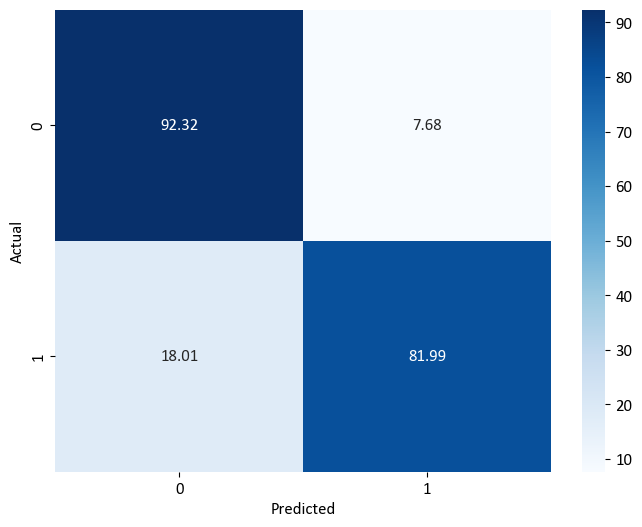

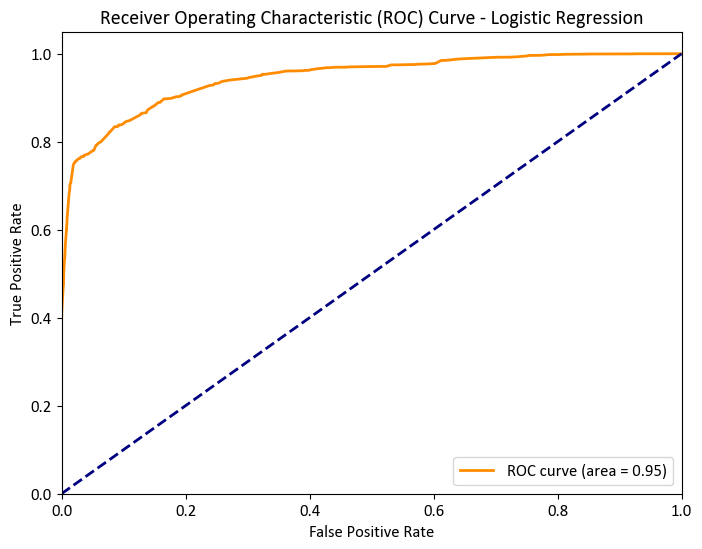

Logistic Regression Precision: 0.9143773811910969
Logistic Regression Recall: 0.8199226827294794
Logistic Regression Error: 0.12842758248673913
Logistic Regression AUC: 0.9451940581628542
**********For Regularized Features*************
***************************Logistic Regression Result***************************************************
Logistic Regression Accuracy: 0.8715724175132609
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     11123
           1       0.91      0.82      0.86     11123

    accuracy                           0.87     22246
   macro avg       0.88      0.87      0.87     22246
weighted avg       0.88      0.87      0.87     22246

Confusion Matrix:
[[10269   854]
 [ 2003  9120]]


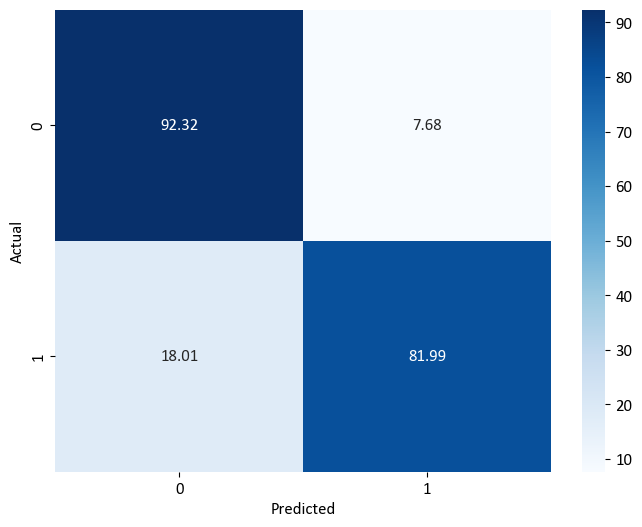

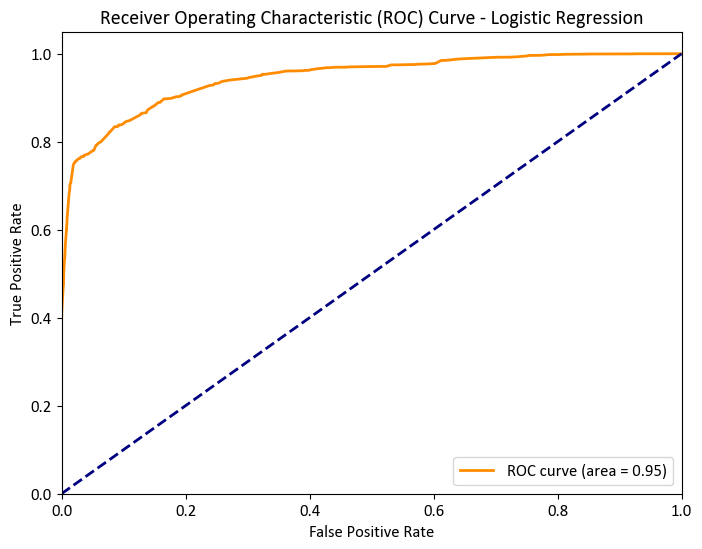

Logistic Regression Precision: 0.9143773811910969
Logistic Regression Recall: 0.8199226827294794
Logistic Regression Error: 0.12842758248673913
Logistic Regression AUC: 0.9451940581628542


In [82]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X1, X2, Y1, Y2 are defined

for X, Y, model_type in zip([X1, X2], [Y1, Y2], ['Normal', 'Regularized']):
    print("**********For {} Features*************".format(model_type))

    # Logistic Regression
    if model_type == 'Normal':
        logreg_model = LogisticRegression()
    elif model_type == 'Regularized':
        logreg_model = LogisticRegression(penalty='l2')  # Regularization strength is already defined in X2 and Y2
    
    logreg_model.fit(X, Y)
    
    logreg_predictions = logreg_model.predict(X)
    accuracy_logreg = accuracy_score(Y, logreg_predictions)

    print("***************************Logistic Regression Result***************************************************")
    print("Logistic Regression Accuracy:", accuracy_logreg)
    print("Classification Report:")
    print(classification_report(Y, logreg_predictions))
    
    # Confusion Matrix for Logistic Regression
    cm_logreg = confusion_matrix(Y, logreg_predictions)
    print("Confusion Matrix:")
    print(confusion_matrix(Y, logreg_predictions))

    # Calculate percentages for display in the plot
    cm_logreg_percentage = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis] * 100.0
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_logreg_percentage, annot=True, fmt=".2f", cmap="Blues", annot_kws={"size": 12})
    #plt.title('Confusion Matrix - Logistic Regression')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


    # ROC Curve and AUC for Logistic Regression
    fpr_logreg, tpr_logreg, _ = roc_curve(Y, logreg_model.predict_proba(X)[:, 1])
    roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
    plt.legend(loc='lower right')
    plt.show()
    
    # Calculate Precision, Recall, and Error for Logistic Regression
    precision_logreg = classification_report(Y, logreg_predictions, output_dict=True)['1']['precision']
    recall_logreg = classification_report(Y, logreg_predictions, output_dict=True)['1']['recall']
    error_logreg = 1 - accuracy_logreg
    print("Logistic Regression Precision:", precision_logreg)
    print("Logistic Regression Recall:", recall_logreg)
    print("Logistic Regression Error:", error_logreg)
    print("Logistic Regression AUC:", roc_auc_logreg)


In [83]:
#summary statistics of the logistic regression model

import statsmodels.api as sm

# Assuming X1, X2, Y1, Y2 are defined

for X, Y, model_type in zip([X1, X2], [Y1, Y2], ['Normal', 'Regularized']):
    print("**********For {} Features*************".format(model_type))

    # Logistic Regression
    if model_type == 'Normal':
        logreg_model = LogisticRegression()
    elif model_type == 'Regularized':
        logreg_model = LogisticRegression(penalty='l2')  # Regularization strength is already defined in X2 and Y2
    
    logreg_model.fit(X, Y)
    
    # Using statsmodels for logistic regression summary
    X_sm = sm.add_constant(X)  # Add a constant term to the features
    logreg_sm = sm.Logit(Y, X_sm)
    result = logreg_sm.fit()

    # Display summary statistics
    print(result.summary())


**********For Normal Features*************
Optimization terminated successfully.
         Current function value: 0.287191
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             ACCTSTATCD   No. Observations:                22246
Model:                          Logit   Df Residuals:                    22231
Method:                           MLE   Df Model:                           14
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.5857
Time:                        22:44:56   Log-Likelihood:                -6388.9
converged:                       True   LL-Null:                       -15420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        

In [84]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assuming X and Y are defined (features and target variable)
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X, Y)

# Odds Ratios
odds_ratios = np.exp(logreg_model.coef_[0])

# Print Odds Ratios
print("\nOdds Ratios:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {odds_ratios[i]}")



Odds Ratios:
CreditScore_Category_500-599: 0.021591155185100772
CreditScore_Category_600-699: 0.01642719326856646
CreditScore_Category_700-799: 0.0017455798907259196
CreditScore_Category_800-900: 0.00011185691430489424
Loan_Amount_Category_10k-20k: 1.4743354143309078
Loan_Amount_Category_20k-30k: 1.9649368045307096
Loan_Amount_Category_30k-40k: 2.6070561838622495
Loan_Amount_Category_40k+: 3.282280560102458
interest_rateMedium: 0.30299916008414307
interest_rateHigh: 0.7707539140094762
DEBT_Category_10-20: 0.025076091130375164
DEBT_Category_20-30: 0.03784480083758352
DEBT_Category_30+: 0.07272715289409315
loan_typeIndirect A: 1.286048312431484


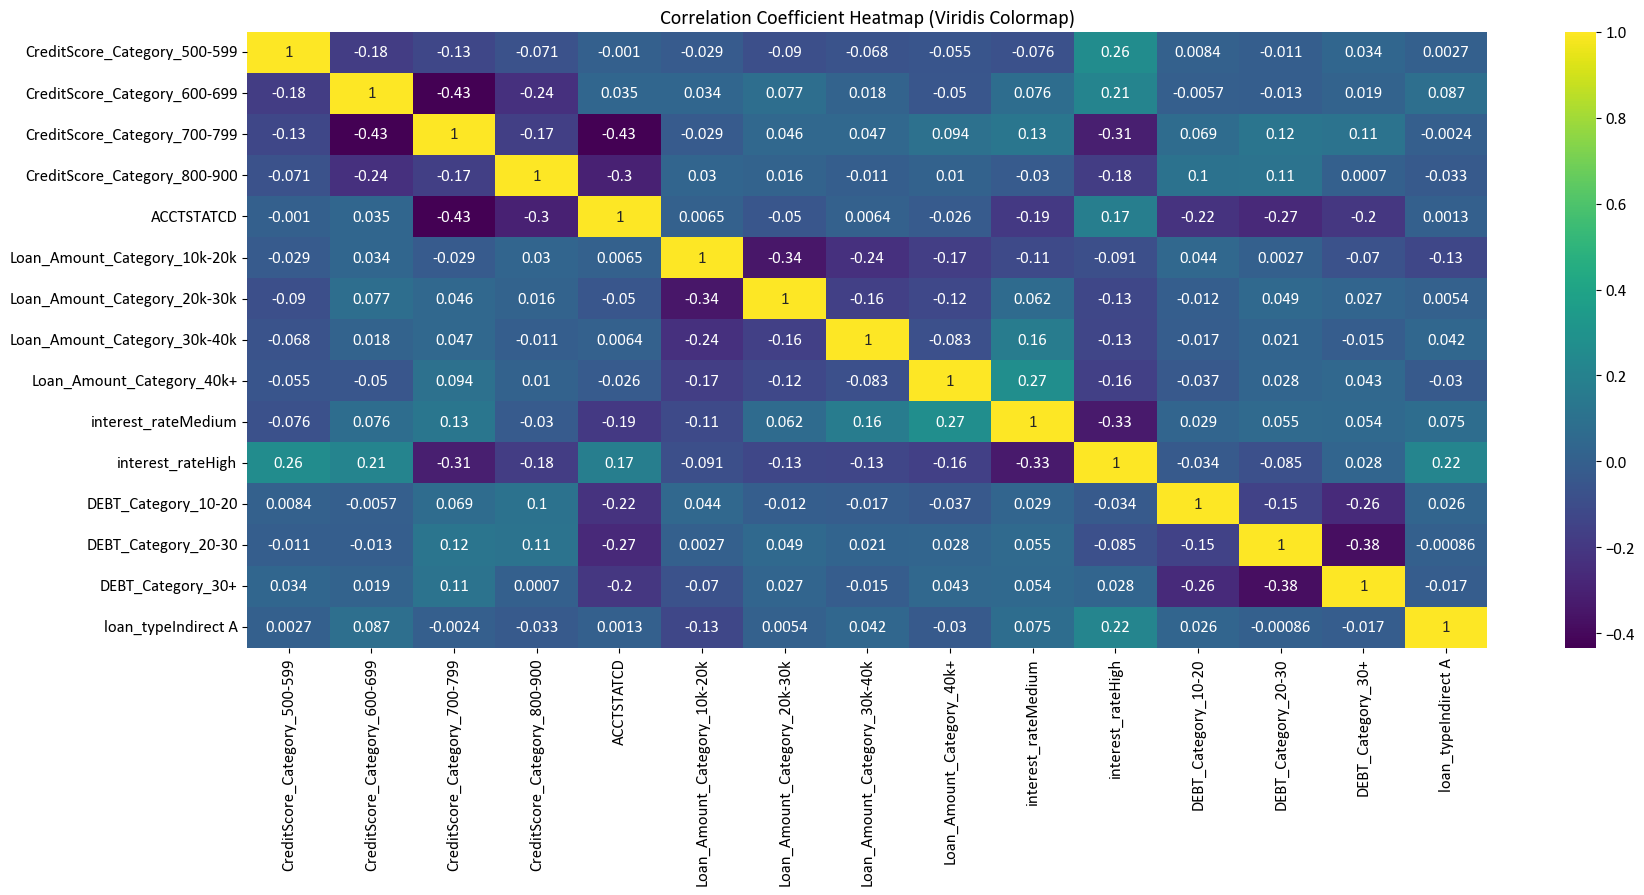

In [85]:
corr_matrix = data.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.title('Correlation Coefficient Heatmap (Viridis Colormap)')
plt.show()

# logistic regression: split
Perform 80/20 testing training split and report error and accuracy and include interpretation - may need to use notes section (confusion matrix, AUC)

**********For Normal Features*************
***************************Logistic Regression Result***************************************************
Logistic Regression Training Accuracy: 0.8729489772982693
Logistic Regression Testing Accuracy: 0.8692134831460674
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2274
           1       0.91      0.82      0.86      2176

    accuracy                           0.87      4450
   macro avg       0.87      0.87      0.87      4450
weighted avg       0.87      0.87      0.87      4450

Confusion Matrix:
[[2089  185]
 [ 397 1779]]


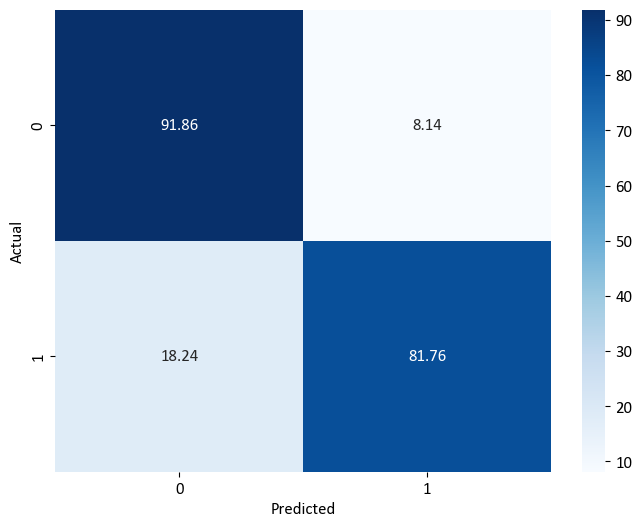

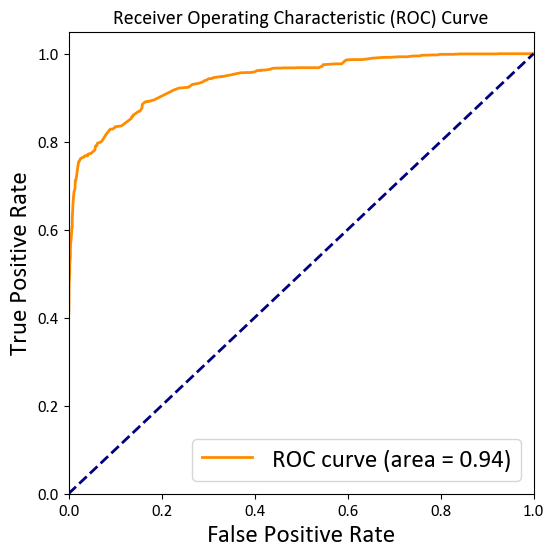

Logistic Regression Precision: 0.9058044806517311
Logistic Regression Recall: 0.8175551470588235
Logistic Regression Error: 0.1307865168539326
Logistic Regression AUC: 0.9426762005923742
**********For Regularized Features*************
***************************Logistic Regression Result***************************************************
Logistic Regression Training Accuracy: 0.8729489772982693
Logistic Regression Testing Accuracy: 0.8692134831460674
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2274
           1       0.91      0.82      0.86      2176

    accuracy                           0.87      4450
   macro avg       0.87      0.87      0.87      4450
weighted avg       0.87      0.87      0.87      4450

Confusion Matrix:
[[2089  185]
 [ 397 1779]]


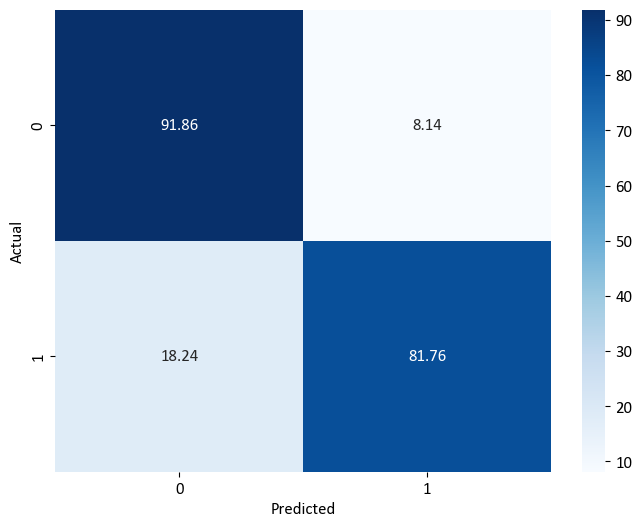

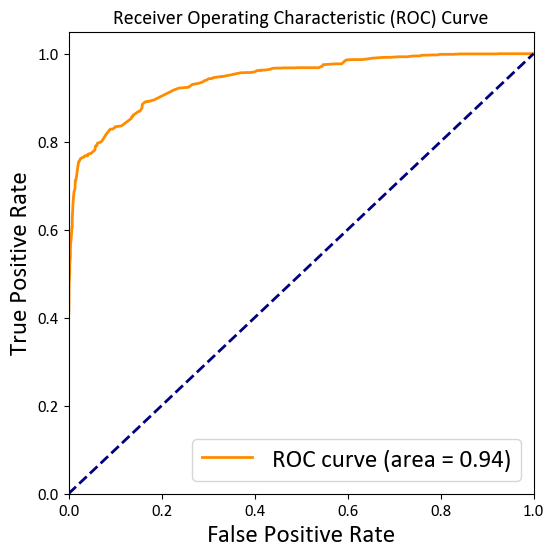

Logistic Regression Precision: 0.9058044806517311
Logistic Regression Recall: 0.8175551470588235
Logistic Regression Error: 0.1307865168539326
Logistic Regression AUC: 0.9426762005923742


In [86]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X1, X2, Y1, Y2 are defined

for X, Y, model_type in zip([X1, X2], [Y1, Y2], ['Normal', 'Regularized']):
    print("**********For {} Features*************".format(model_type))

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Logistic Regression
    if model_type == 'Normal':
        logreg_model = LogisticRegression()
    elif model_type == 'Regularized':
        logreg_model = LogisticRegression(penalty='l2')  # Regularization strength is already defined in X2 and Y2
    
    logreg_model.fit(X_train, Y_train)
    
    # Calculate training accuracy
    logreg_train_predictions = logreg_model.predict(X_train)
    accuracy_logreg_train = accuracy_score(Y_train, logreg_train_predictions)

    # Calculate testing accuracy
    logreg_test_predictions = logreg_model.predict(X_test)
    accuracy_logreg_test = accuracy_score(Y_test, logreg_test_predictions)

    print("***************************Logistic Regression Result***************************************************")
    print("Logistic Regression Training Accuracy:", accuracy_logreg_train)
    print("Logistic Regression Testing Accuracy:", accuracy_logreg_test)
    print("Classification Report for Testing Data:")
    print(classification_report(Y_test, logreg_test_predictions))
    
    # Confusion Matrix for Logistic Regression
    cm_logreg = confusion_matrix(Y_test, logreg_test_predictions)
    print("Confusion Matrix:")
    print(cm_logreg)

    # Calculate percentages for display in the plot
    cm_logreg_percentage = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis] * 100.0
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_logreg_percentage, annot=True, fmt=".2f", cmap="Blues", annot_kws={"size": 12})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC for Logistic Regression
    fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, logreg_model.predict_proba(X_test)[:, 1])
    roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right', fontsize=18)
    plt.show()
    
    # Calculate Precision, Recall, and Error for Logistic Regression on Testing Data
    precision_logreg_test = classification_report(Y_test, logreg_test_predictions, output_dict=True)['1']['precision']
    recall_logreg_test = classification_report(Y_test, logreg_test_predictions, output_dict=True)['1']['recall']
    error_logreg_test = 1 - accuracy_logreg_test
    print("Logistic Regression Precision:", precision_logreg_test)
    print("Logistic Regression Recall:", recall_logreg_test)
    print("Logistic Regression Error:", error_logreg_test)
    print("Logistic Regression AUC:", roc_auc_logreg)


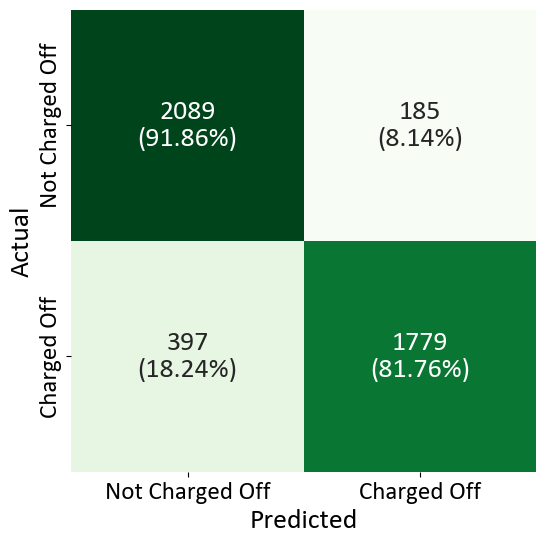

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming logreg_test_predictions contains your predicted labels and Y_test contains the true labels
# Use the same Y_test and logreg_test_predictions from the first part

# Confusion Matrix
cm_logreg = confusion_matrix(Y_test, logreg_test_predictions)

# Labels for the confusion matrix
labels = ['Not Charged Off', 'Charged Off']

# Calculate percentages for display in the plot
cm_logreg_percentage = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis] * 100.0

plt.figure(figsize=(6, 6))

# Create combined annotations for each cell
annot_labels = np.empty_like(cm_logreg, dtype=np.dtype('U50'))  # Adjust the width of the string accordingly
for i in range(cm_logreg.shape[0]):
    for j in range(cm_logreg.shape[1]):
        annot_labels[i, j] = f"{cm_logreg[i, j]}\n({cm_logreg_percentage[i, j]:.2f}%)"

# Create heatmap with combined annotations
sns.heatmap(cm_logreg, annot=annot_labels, fmt='', cmap="Greens", annot_kws={"size": 20},
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel('Predicted', fontsize=20)  # Adjust the font size as needed
plt.ylabel('Actual', fontsize=20)  # Adjust the font size as needed
plt.xticks(fontsize=18)  # Adjust the font size as needed
plt.yticks(fontsize=18)  # Adjust the font size as needed
# plt.title('Confusion Matrix for Logistic Regression (Counts and Percentages)')

plt.show()


# RANDOM FOREST
Perform one ML model and report your results showing accuracy (confusion matrix, AUC) and feature importance

**********For Normal Features*************
***************************Random Forest Result***************************************************
Random Forest Training Accuracy: 0.8892447741065408
Random Forest Testing Accuracy: 0.8876404494382022
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2274
           1       0.91      0.85      0.88      2176

    accuracy                           0.89      4450
   macro avg       0.89      0.89      0.89      4450
weighted avg       0.89      0.89      0.89      4450

Confusion Matrix:
[[2101  173]
 [ 327 1849]]


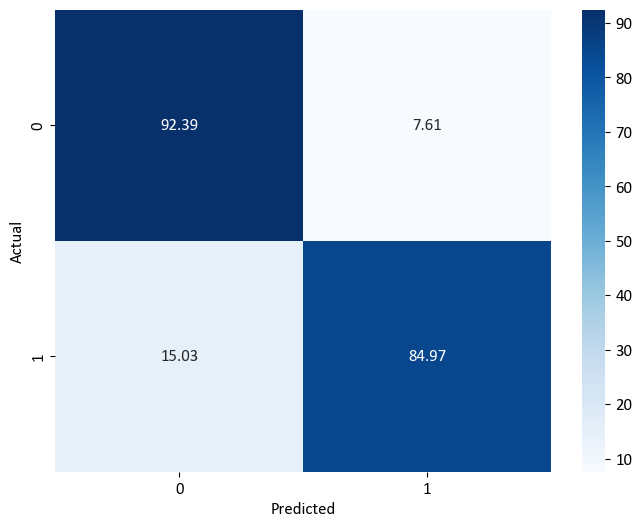

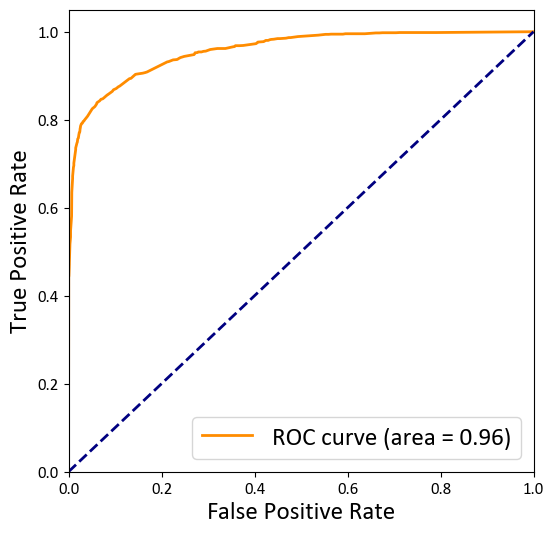

Random Forest Precision: 0.9144411473788329
Random Forest Recall: 0.8497242647058824
Random Forest Error: 0.1123595505617978
Random Forest AUC: 0.956892917539707
**********For Regularized Features*************
***************************Random Forest Result***************************************************
Random Forest Training Accuracy: 0.8892447741065408
Random Forest Testing Accuracy: 0.8876404494382022
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2274
           1       0.91      0.85      0.88      2176

    accuracy                           0.89      4450
   macro avg       0.89      0.89      0.89      4450
weighted avg       0.89      0.89      0.89      4450

Confusion Matrix:
[[2101  173]
 [ 327 1849]]


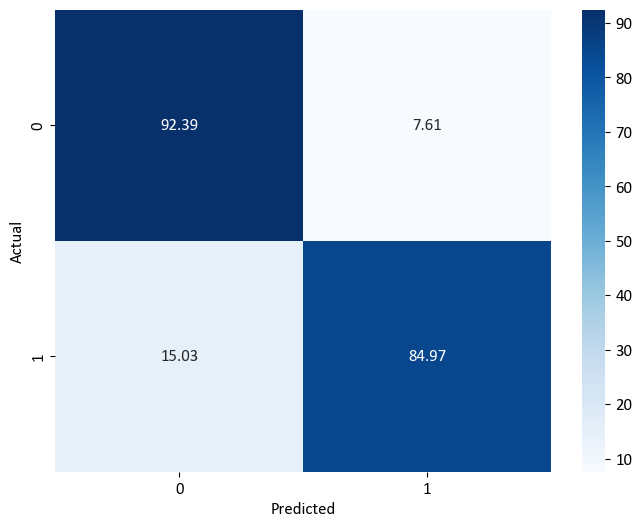

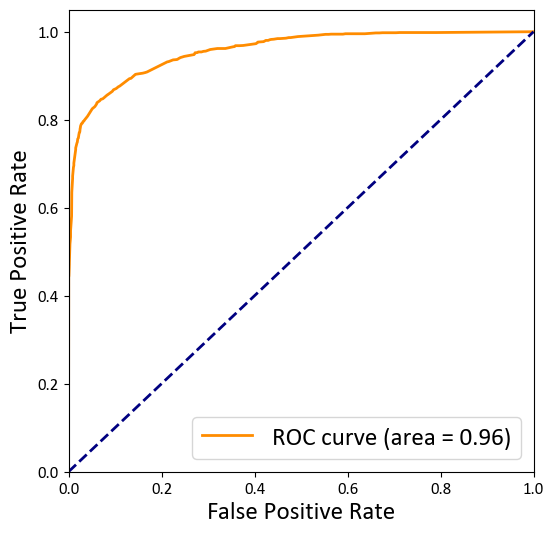

Random Forest Precision: 0.9144411473788329
Random Forest Recall: 0.8497242647058824
Random Forest Error: 0.1123595505617978
Random Forest AUC: 0.956892917539707


In [88]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X1, X2, Y1, Y2 are defined

for X, Y, model_type in zip([X1, X2], [Y1, Y2], ['Normal', 'Regularized']):
    print("**********For {} Features*************".format(model_type))

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    random_forest_model.fit(X_train, Y_train)
    
    # Calculate training accuracy
    random_forest_train_predictions = random_forest_model.predict(X_train)
    accuracy_random_forest_train = accuracy_score(Y_train, random_forest_train_predictions)

    # Calculate testing accuracy
    random_forest_test_predictions = random_forest_model.predict(X_test)
    accuracy_random_forest_test = accuracy_score(Y_test, random_forest_test_predictions)

    print("***************************Random Forest Result***************************************************")
    print("Random Forest Training Accuracy:", accuracy_random_forest_train)
    print("Random Forest Testing Accuracy:", accuracy_random_forest_test)
    print("Classification Report:")
    print(classification_report(Y_test, random_forest_test_predictions))
    
    # Confusion Matrix for Random Forest
    cm_random_forest = confusion_matrix(Y_test, random_forest_test_predictions)
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, random_forest_test_predictions))

    # Calculate percentages for display in the plot
    cm_random_forest_percentage = cm_random_forest.astype('float') / cm_random_forest.sum(axis=1)[:, np.newaxis] * 100.0
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_random_forest_percentage, annot=True, fmt=".2f", cmap="Blues", annot_kws={"size": 12})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC for Random Forest
    fpr_random_forest, tpr_random_forest, _ = roc_curve(Y_test, random_forest_model.predict_proba(X_test)[:, 1])
    roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr_random_forest, tpr_random_forest, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_random_forest))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)  # Adjust the font size as needed
    plt.ylabel('True Positive Rate', fontsize=18)  # Adjust the font size as needed
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right', fontsize=18)  # Adjust the font size as needed
    plt.show()
    
    # Calculate Precision, Recall, and Error for Random Forest on Testing Data
    precision_random_forest = classification_report(Y_test, random_forest_test_predictions, output_dict=True)['1']['precision']
    recall_random_forest = classification_report(Y_test, random_forest_test_predictions, output_dict=True)['1']['recall']
    error_random_forest = 1 - accuracy_random_forest_test
    print("Random Forest Precision:", precision_random_forest)
    print("Random Forest Recall:", recall_random_forest)
    print("Random Forest Error:", error_random_forest)
    print("Random Forest AUC:", roc_auc_random_forest)


# PREDICTION REPORT

In [89]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X1, X2, Y1, Y2 are defined, and datasheet is your original datasheet

for X, Y, model_type in zip([X1, X2], [Y1, Y2], ['Normal', 'Regularized']):
    print("**********For {} Features*************".format(model_type))

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    random_forest_model.fit(X_train, Y_train)
    
    # Predict values for the original features
    original_predictions = random_forest_model.predict(X)

    # Create a DataFrame with original features, actual values, and predicted values
    results_df = pd.DataFrame(data=np.column_stack([X, Y, original_predictions]), 
                              columns=list(X.columns) + ['Actual', 'Predicted'])

    # Merge the original datasheet with the DataFrame containing actual and predicted values
    merged_df = pd.concat([data, results_df], axis=1)

    # Display or save the merged DataFrame
    print("Merged DataFrame for {} Features:".format(model_type))
    print(merged_df)

    # Save the merged DataFrame to Excel
    excel_filename = "merged_results_{}.xlsx".format(model_type)
    merged_df.to_excel(excel_filename, index=False)
    print("Merged DataFrame saved to {}".format(excel_filename))

    # Continue with the rest of your code for evaluation and visualization...


**********For Normal Features*************
Merged DataFrame for Normal Features:
       CreditScore_Category_500-599  CreditScore_Category_600-699  \
0                                 0                             0   
1                                 0                             1   
2                                 0                             1   
3                                 0                             1   
4                                 0                             1   
...                             ...                           ...   
22241                             0                             1   
22242                             0                             1   
22243                             0                             1   
22244                             0                             1   
22245                             1                             0   

       CreditScore_Category_700-799  CreditScore_Category_800-900  ACCTSTATCD  \
0        

Merged DataFrame saved to merged_results_Regularized.xlsx


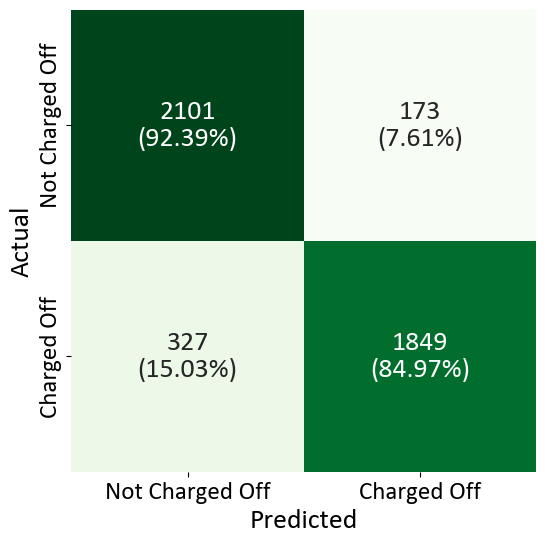

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_predictions contains your predicted labels and Y_test contains the true labels

# Train a Random Forest classifier (you should replace the parameters with your own)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)  # Replace X_train and Y_train with your training data

# Get predictions from the Random Forest model
rf_predictions = rf_model.predict(X_test)  # Replace X_test with your test data

# Confusion Matrix
cm_rf = confusion_matrix(Y_test, rf_predictions)

# Calculate percentages for display in the plot
cm_rf_percentage = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100.0

plt.figure(figsize=(6, 6))

# Create combined annotations for each cell
annot_labels_rf = np.empty_like(cm_rf, dtype=np.dtype('U50'))  # Adjust the width of the string accordingly
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        annot_labels_rf[i, j] = f"{cm_rf[i, j]}\n({cm_rf_percentage[i, j]:.2f}%)"

# Create heatmap with combined annotations
sns.heatmap(cm_rf, annot=annot_labels_rf, fmt='', cmap="Greens", annot_kws={"size": 20},
            xticklabels=labels, yticklabels=labels, cbar=False)


plt.xlabel('Predicted', fontsize=20)  # Adjust the font size as needed
plt.ylabel('Actual', fontsize=20)  # Adjust the font size as needed
plt.xticks(fontsize=18)  # Adjust the font size as needed
plt.yticks(fontsize=18)  # Adjust the font size as needed
# plt.title('Confusion Matrix for Logistic Regression (Counts and Percentages)')

plt.show()


In [91]:
 # Feature Importance
feature_importances = random_forest_model.feature_importances_
features = list(X.columns)
importance_data = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print(importance_data.sort_values(by='Importance', ascending=False))

                         Feature  Importance
2   CreditScore_Category_700-799    0.266858
3   CreditScore_Category_800-900    0.164230
11           DEBT_Category_20-30    0.120648
12             DEBT_Category_30+    0.112793
10           DEBT_Category_10-20    0.099806
1   CreditScore_Category_600-699    0.074352
8            interest_rateMedium    0.049604
0   CreditScore_Category_500-599    0.027687
9              interest_rateHigh    0.026843
13           loan_typeIndirect A    0.017111
4   Loan_Amount_Category_10k-20k    0.011614
5   Loan_Amount_Category_20k-30k    0.010654
6   Loan_Amount_Category_30k-40k    0.009613
7      Loan_Amount_Category_40k+    0.008187


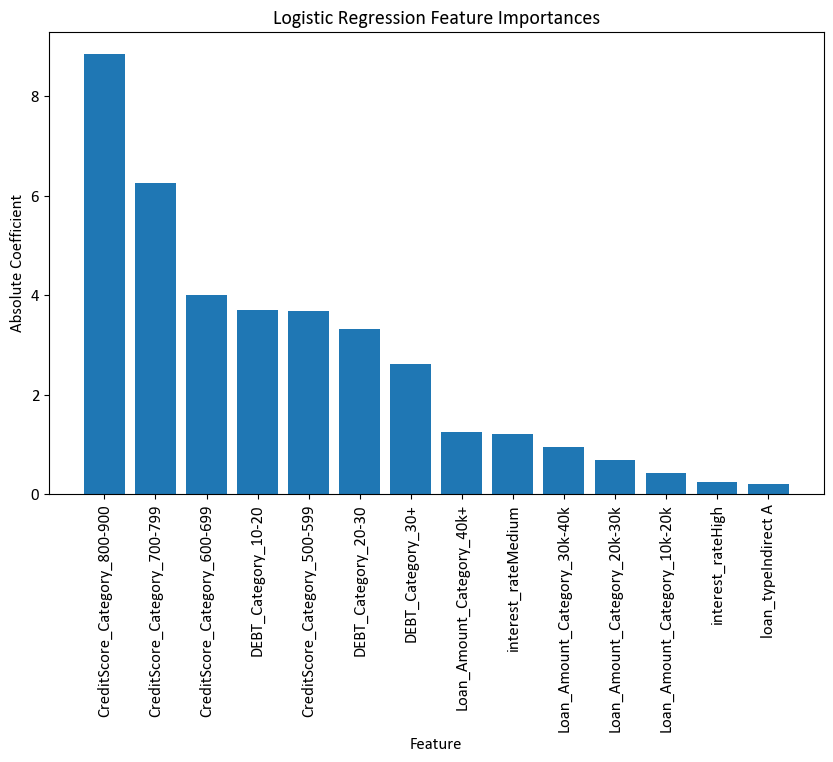

In [92]:
import numpy as np

# Assuming you have already trained a logistic regression model (logreg_model)
# For example:
# logreg_model = LogisticRegression()
# logreg_model.fit(X_train, Y_train)

# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X_train.columns  # Replace with your feature names

# Calculate the absolute coefficients
abs_coefficients = np.abs(coefficients)

# Sort features by their absolute coefficients in descending order
sorted_idx = np.argsort(abs_coefficients)[::-1]

# Create a bar chart to visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(abs_coefficients)), abs_coefficients[sorted_idx])
plt.xticks(range(len(abs_coefficients)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Logistic Regression Feature Importances')
plt.show()


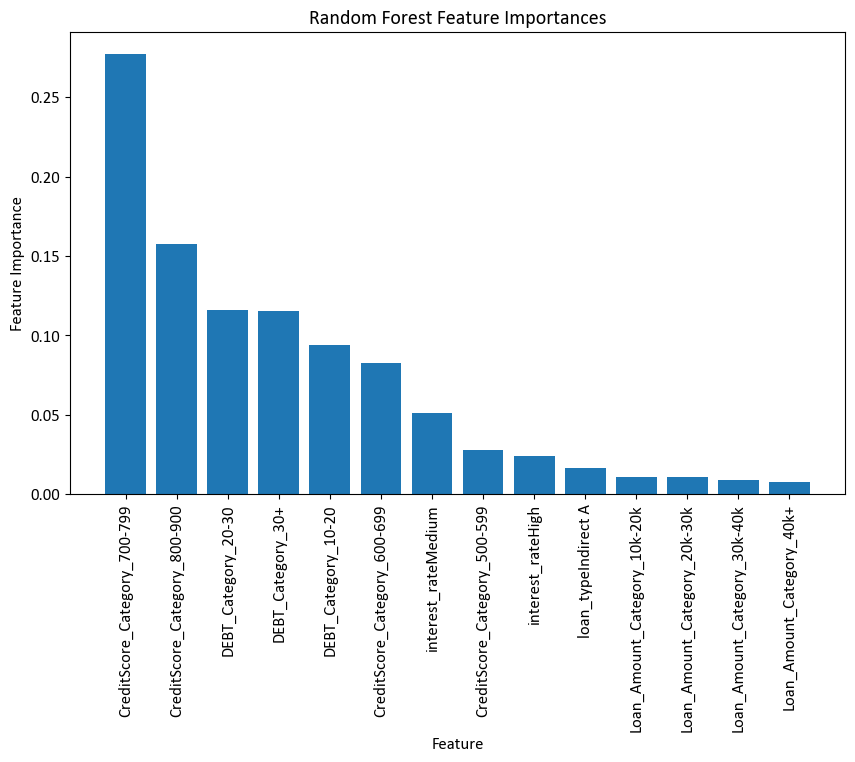

In [93]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have X_train and Y_train defined and split your data
# Also, assuming you have already trained a random forest model (rf_model)
# For example:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace with your feature names

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()
